# DS-SF-34 | 07 | Linear Regression | Codealong | Starter Code

In [3]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

In [4]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'dataset-07-zillow.csv'), index_col = 'ID')

df = read_dataset()

In [5]:
# TODO
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalePrice,1000.0,1.397423,1.736413,0.000001,0.8,1.1,1.5325,32.7
IsAStudio,986.0,0.029412,0.169043,0.000000,0.0,0.0,0.0000,1.0
Beds,836.0,2.572967,1.250891,1.000000,2.0,2.0,3.0000,9.0
Baths,942.0,1.977548,1.130334,1.000000,1.0,2.0,2.0000,14.0
Size,967.0,1641.300931,1027.016175,264.000000,1027.5,1350.0,1947.5000,11500.0
LotSize,556.0,3020.640288,2853.430139,44.000000,2375.0,2622.0,3049.0000,47916.0
BuiltInYear,975.0,1947.533333,38.021563,1870.000000,1912.0,1939.0,1986.0000,2015.0


## Scale `Size` and `LotSize` from sqft to '1,000 sqft'

In [6]:
def scale_variables(df):
    df.Size /= 10 ** 3 # Size in 1,000 sqft
    df.LotSize /= 10 ** 3 # Lot size in 1,000 sqft

scale_variables(df)

In [10]:
df[ ['Size', 'LotSize'] ]

,Size,LotSize
ID,,
15063471,0.550,NaN
15063505,1.430,2.435
15063609,2.040,3.920
15064044,1.060,NaN
15064257,1.299,NaN
...,...,...
2124214951,0.264,NaN
2126960082,0.691,NaN
2128308939,1.738,2.299


## Part A | Linear Regression with _statsmodels_' `OLS`

- (http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html)

### `SalePrice` as a function of `Size`

In [18]:
print df[['Size']]

             Size
ID               
15063471    0.550
15063505    1.430
15063609    2.040
15064044    1.060
15064257    1.299
...           ...
2124214951  0.264
2126960082  0.691
2128308939  1.738
2131957929  1.048
2136213970  0.900

[1000 rows x 1 columns]


In [30]:
def Xy(df):
    # TODO: X
    # TODO: y
    # X is a dataframe
    X = df[['Size']] 
     # Y is a series
    y = df.SalePrice
    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 08 May 2017   Prob (F-statistic):                nan
Time:                        19:41:16   Log-Likelihood:                    nan
No. Observations:                1000   AIC:                               nan
Df Residuals:                    1000   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size              nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` - Take 2

In [31]:
def Xy_2(df):
    # TODO: X
    # TODO: y
    df=df.dropna(subset=['Size'])
    # X is a dataframe
    X = df[['Size']] 
     # Y is a series
    y = df.SalePrice
    return X, y

X, y = Xy_2(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 08 May 2017   Prob (F-statistic):          7.83e-177
Time:                        19:41:19   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` - Take 3

- (http://statsmodels.sourceforge.net/devel/generated/statsmodels.tools.tools.add_constant.html)

In [32]:
sm.tools.tools.add_constant(df[['Size']])

,const,Size
ID,,
15063471,1,0.550
15063505,1,1.430
15063609,1,2.040
15064044,1,1.060
15064257,1,1.299
...,...,...
2124214951,1,0.264
2126960082,1,0.691
2128308939,1,1.738


In [8]:
def Xy_3(df):
    # TODO: X
    # TODO: y
    df=df.dropna(subset=['Size'])
    
    # X is a dataframe
    X = sm.tools.tools.add_constant(df[['Size']])
     # Y is a series
    y = df.SalePrice
    return X, y

X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Fri, 19 May 2017   Prob (F-statistic):           2.67e-58
Time:                        13:46:08   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
len(y)

1000

967
967


(0, 2)

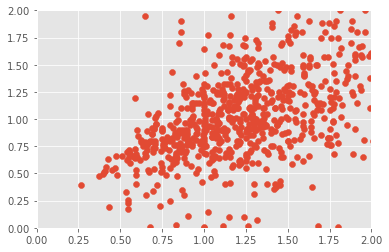

In [74]:
import matplotlib.pyplot
import pylab
df=df.dropna(subset=['Size'])
    # X is a dataframe
X = df[['Size']] 
y = df.SalePrice
print len(y)
print len(X)
matplotlib.pyplot.scatter(X,y)
pylab.ylim([0,2])
pylab.xlim([0,2])

### Making predictions

In [34]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]}, columns = ['Size'])
predict_X = sm.add_constant(predict_X)

In [35]:
predict_X

,const,Size
0,1,1.2
1,1,1.4
2,1,1.6


In [75]:
predict_y = model.predict(predict_X)

In [76]:
predict_y

array([ 1.05472548,  1.2046711 ,  1.35461672])

In [77]:
type(predict_y)

numpy.ndarray

### Model's parameters

In [ ]:
# TODO

### t-values

In [ ]:
# TODO

### p-values

In [ ]:
# TODO

### Confidence Intervals

In [ ]:
# TODO

## Part B | The 68 - 90 - 95 - 99.7 Rule

- (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [78]:
stats.norm.cdf(0)
# TODO

0.5

In [79]:
print "For normally distributed data:"
for z in [1, 1.65, 2, 3]:
    print "\t- {:3.2f}% of it is between +/- {:1.2f} sigma(s)".\
        format((stats.norm.cdf(z) - stats.norm.cdf(-z)) * 100, z)

For normally distributed data:
	- 68.27% of it is between +/- 1.00 sigma(s)
	- 90.11% of it is between +/- 1.65 sigma(s)
	- 95.45% of it is between +/- 2.00 sigma(s)
	- 99.73% of it is between +/- 3.00 sigma(s)


> ### `norm.ppf` (percent point function) is the  inverse of `norm.cdf`:

In [80]:
stats.norm.ppf(stats.norm.cdf(1))

1.0

> ### $\sigma$ for the 90% rule?

In [81]:
# TODO

## Part C | Linear Regression with _statsmodels_' `ols`

- (http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/formulas.html)

In [9]:
# TODO   ols uses the cute formula notation

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Fri, 19 May 2017   Prob (F-statistic):           2.67e-58
Time:                        13:46:18   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` without `Intercept`

In [10]:
# TODO  that is a tilde, not a minus.  0 + removes the intercept  or 'SalePrice ~ Size - 1'
model = smf.ols(formula = 'SalePrice ~ 0 + Size + LotSize + Beds + Baths', data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     376.9
Date:                Fri, 19 May 2017   Prob (F-statistic):          2.79e-138
Time:                        13:46:23   Log-Likelihood:                -634.08
No. Observations:                 429   AIC:                             1276.
Df Residuals:                     425   BIC:                             1292.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           1.1620      0.067     17.216      0.000         1.029     1.295
LotSize        0.0272      0.021      1.303      0.193        -0.014     0.068
Beds          -0.4343      0.049     -8.792      0.000        -0.531    -0.337
Baths          0.2788      0.059      4.739      0.000         0.163     0.395
==============================================================================
Omnibus:                      272.424   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6604.663
Skew:                           2.266   Prob(JB):                         0.00
Kurtosis:                      21.680   Cond. No.                         8.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Dropping outliers

In [11]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', df.shape[0]

    # TODO

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    # TODO

    print '- n (after)  =', df.shape[0]

drop_outliers(df)

Dropping outliers
- n (before) = 1000
- Q1         =

NameError: global name 'Q1' is not defined

### `SalePrice` as a function of `Size` (again)

In [ ]:
# TODO

model.summary()

## Part D | Checking modeling assumptions

In [12]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

### Are the residuals normally distributed?

In [ ]:
# TODO

### Are the residuals normally distributed?  `.qqplot()`

In [13]:
# TODO
model.qqplot()

AttributeError: 'OLSResults' object has no attribute 'qqplot'

### Are x and $\varepsilon$ independent?  `.plot_regress_exog()`

In [ ]:
# TODO

## Part E | Model's Fit and $R^2$

In [ ]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # rescale the variables (use the function defined above)

### $SalePrice = \beta_0 + \beta_1 \times Size$

In [ ]:
X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

In [ ]:
model.rsquared

In [ ]:
y_hat = model.predict(X)

var_y_hat = sum((y - y_hat) ** 2)
var_y = sum((y - y.mean()) ** 2)

1 - var_y_hat / var_y

### $SalePrice = \beta_1 \times Size$

In [ ]:
X, y = Xy_2(df)

model = smf.OLS(y, X).fit()

model.rsquared

> #### Is it real?

In [ ]:
y_hat = model.predict(X)

In [ ]:
1 - sum((y - y_hat) ** 2) / sum((y - y.mean()) ** 2)

## Part F | Calculating the t-value, p-value, and confidence interval for `Intercept`

- (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

### $SalePrice = \beta_0 + \beta_1 \times Size$

In [ ]:
X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

> ### Given the coefficient $\beta_0$ and the standard error $SE_{\beta_0}$

In [ ]:
print model.params.const
print model.bse.const

> ### $t\text{-}value_{\beta_0}$:

In [ ]:
model.tvalues.const

In [ ]:
# TODO

> ### $p\text{-}value_{\beta_0}$:

In [ ]:
model.pvalues.const

In [ ]:
print 'Degrees of freedom (df):', model.df_resid

In [ ]:
# TODO

> ### $CI_{\beta_0}$:

In [ ]:
model.conf_int().T.const

In [ ]:
# TODO

> ### (We can also calculate $SE_{\beta_0}$:)

In [ ]:
model.bse.const

In [ ]:
XTX_1 = np.linalg.inv(np.dot(X.T, X))

XTX_1

In [ ]:
v0 = XTX_1[0, 0]

v0

In [ ]:
sigma_hat = np.sqrt(1. / model.df_resid * (y ** 2 - y_hat ** 2).sum())

In [ ]:
np.sqrt(v0) * sigma_hat